<a href="https://colab.research.google.com/github/Razib1998/B8A2-Gamer-Zone-main/blob/main/Explotary_Data_Analysis_and_data_pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Set up and data Loading

In this section we will:



*   Import basic libraries
*   Upload and load the heart.csv file
*   Take a first quick look at the data



In [ ]:


# Import Neccessary library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')
sns.set(font_scale = 1.1)
from google.colab import files

In [ ]:
# Upload the file from local mashine
uploaded = files.upload()
# The Kaggle file is named "heart.csv"
df = pd.read_csv('heart.csv')
df.head(10)

Saving heart.csv to heart.csv


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


**Attribute Information:**

* Age: age of the patient [years]

* Sex: sex of the patient [M: Male, F: Female]

* ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

* RestingBP: resting blood pressure [mm Hg]

* Cholesterol: serum cholesterol [mm/dl]

* FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

* RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

* MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

* ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

* Oldpeak: oldpeak = ST [Numeric value measured in depression]

* ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

* HeartDisease: output class [1: heart disease, 0: Normal]

In [ ]:
# Basics info about rows columns and shape
print("Shape :", df.shape)

Shape : (918, 12)


In [ ]:
print('Info :',df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
Info : None


In [ ]:
# Quick descriptive statistics for numeric columns

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


## 2. Define Target and Feature Types

We will explicitly define which columns are numeric and which are categorical. This helps keep the rest of the notebook clean and less error prone.

In [ ]:
# Define target and features types

target_col = 'HeartDisease'
numeric_cols = ["Age", "RestingBP", "Cholesterol", "FastingBS",
                "MaxHR", "Oldpeak"]
cat_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina','ST_Slope']
print('This is our target columns :',target_col)
print('This is our Numerical columns :',numeric_cols)
print('This is our categorical columns :',cat_cols)

This is our target columns : HeartDisease
This is our Numerical columns : ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
This is our categorical columns : ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


### 3. Check Missing values and basic quality checks

In [ ]:
# Check missing value

df.isna().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


> Insight: Even if the dataset description claims there are no missing values, always verify. Real world data often breaks promises.

In [ ]:
# Look at the some values range

df[numeric_cols].agg(['max','min','mean','median']).T

,max,min,mean,median
Age,77.0,28.0,53.510893,54.0
RestingBP,200.0,0.0,132.396514,130.0
Cholesterol,603.0,0.0,198.799564,223.0
FastingBS,1.0,0.0,0.233115,0.0
MaxHR,202.0,60.0,136.809368,138.0
Oldpeak,6.2,-2.6,0.887364,0.6


> Insight: Look for impossible or suspicious ranges such as zero cholesterol or resting blood pressure that is extremely low or high. These may be data entry issues or special codes that you need to treat carefully.

In [ ]:
# check all unique value for categorical columns

for c in cat_cols:
  print(c, df[c].unique())

Sex ['M' 'F']
ChestPainType ['ATA' 'NAP' 'ASY' 'TA']
RestingECG ['Normal' 'ST' 'LVH']
ExerciseAngina ['N' 'Y']
ST_Slope ['Up' 'Flat' 'Down']


### 4. Understanding Distributions with Histograms and Boxplots

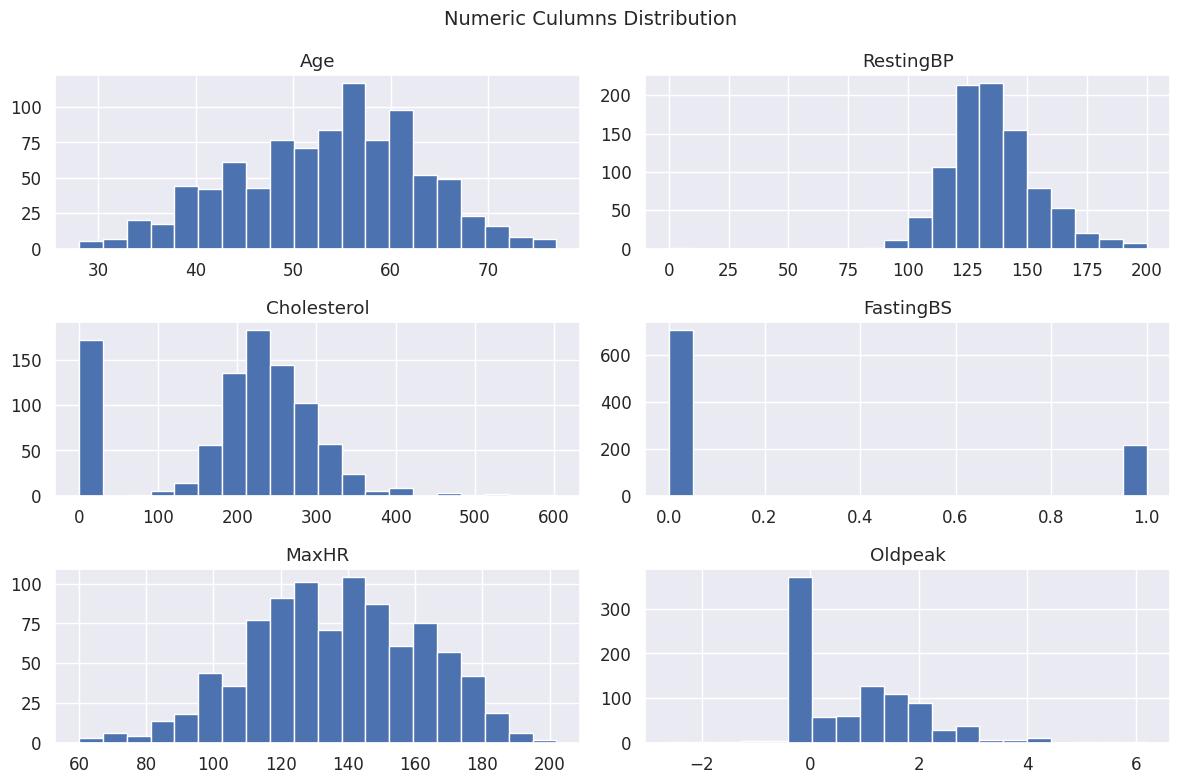

In [ ]:
df[numeric_cols].hist(bins =20, figsize =(12,8))
plt.suptitle("Numeric Culumns Distribution", fontsize = 14)
plt.tight_layout()
plt.show()

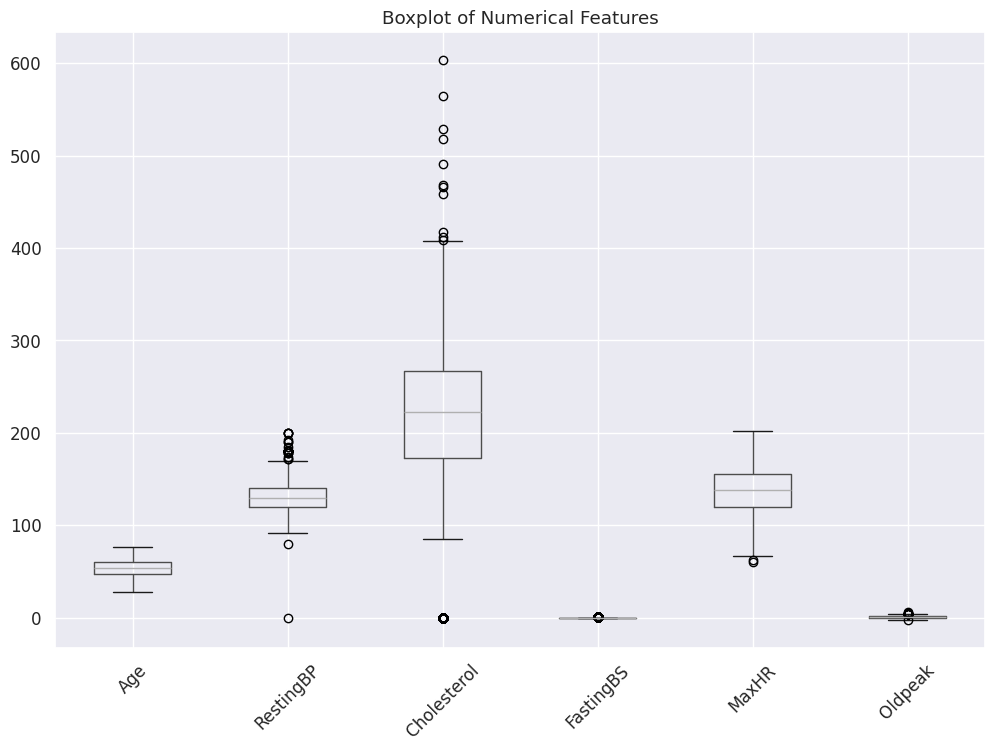

In [ ]:
# Boxplots to get a sense of spread and possible outliers
plt.figure(figsize=(12,8))
df[numeric_cols].boxplot()
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45)
plt.show()

### 4. Target class distribution and imbalance

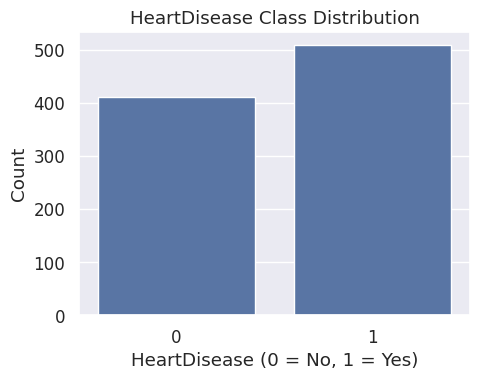

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(x = df[target_col])
plt.title("HeartDisease Class Distribution")
plt.xlabel("HeartDisease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [ ]:
df[target_col].value_counts(normalize = True)

,proportion
HeartDisease,
1,0.553377
0,0.446623


### 6. Categorical Features Exploration

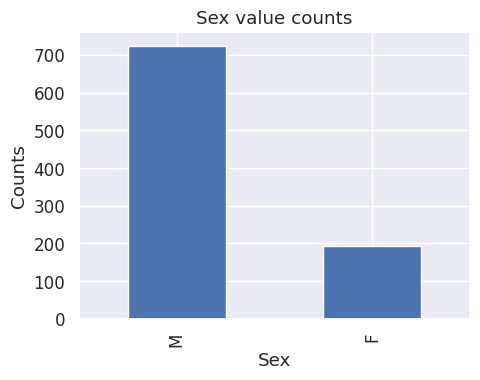

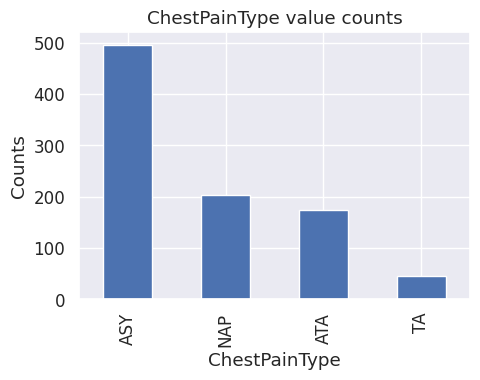

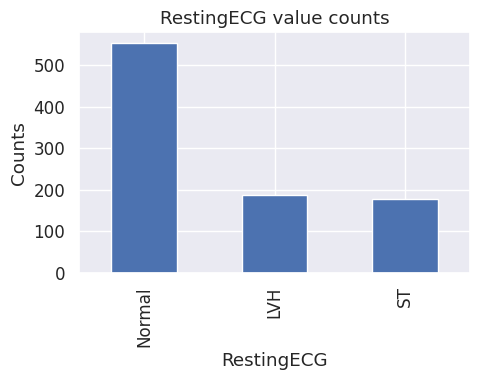

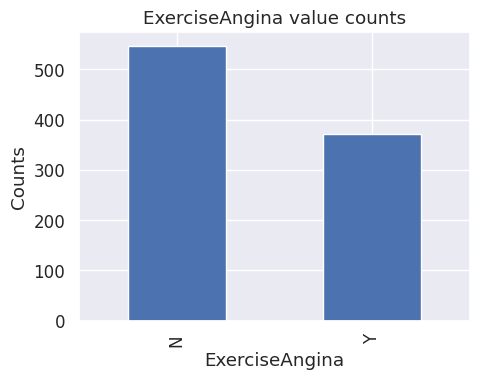

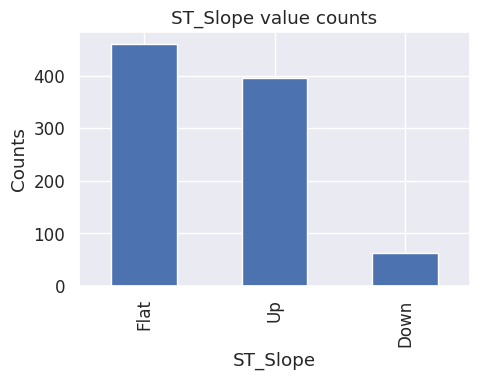

In [ ]:
# Categorical Feature exploration
for c in cat_cols:
  plt.figure(figsize=(5,4))
  df[c].value_counts().plot(kind = "bar")
  plt.title(f"{c} value counts")
  plt.ylabel('Counts')
  plt.tight_layout()
  plt.show()


> Insight: For categorical variables, check if some categories have very few samples. Rare categories can be merged, encoded carefully, or sometimes dropped if they add noise instead of signal.

### 7. Realationship between Features and Target

We will first visualize numeric features against the target and then look at correlations.

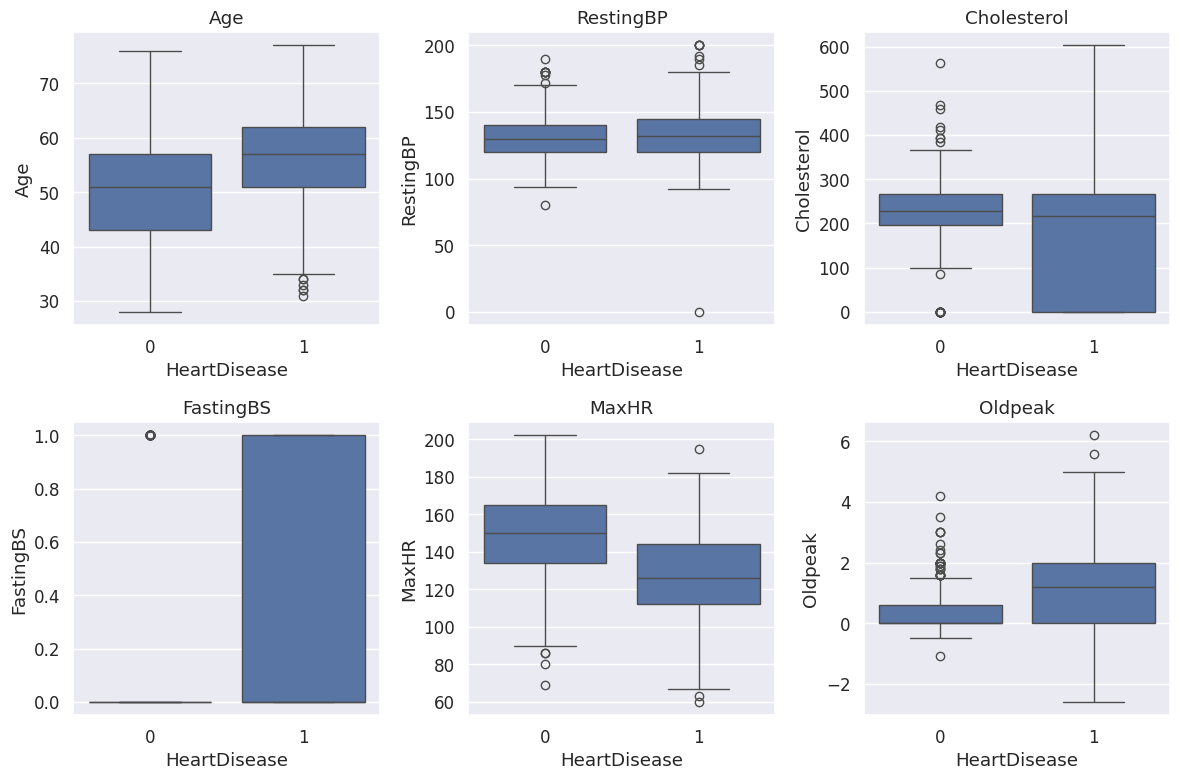

In [ ]:
# Boxplots of numeric features split by Heartdisease

plt.figure(figsize=(12,8))
for i, col in enumerate(numeric_cols,1):
  plt.subplot(2,3,i)
  sns.boxplot(x = df[target_col],y = df[col])
  plt.title(col)

plt.tight_layout()
plt.show()




> Insight: Large differences in distributions between target classes often signal strong predictive potential. If the distributions are almost identical, that feature may be less useful on its own.

### Pairplot for a subset of Features

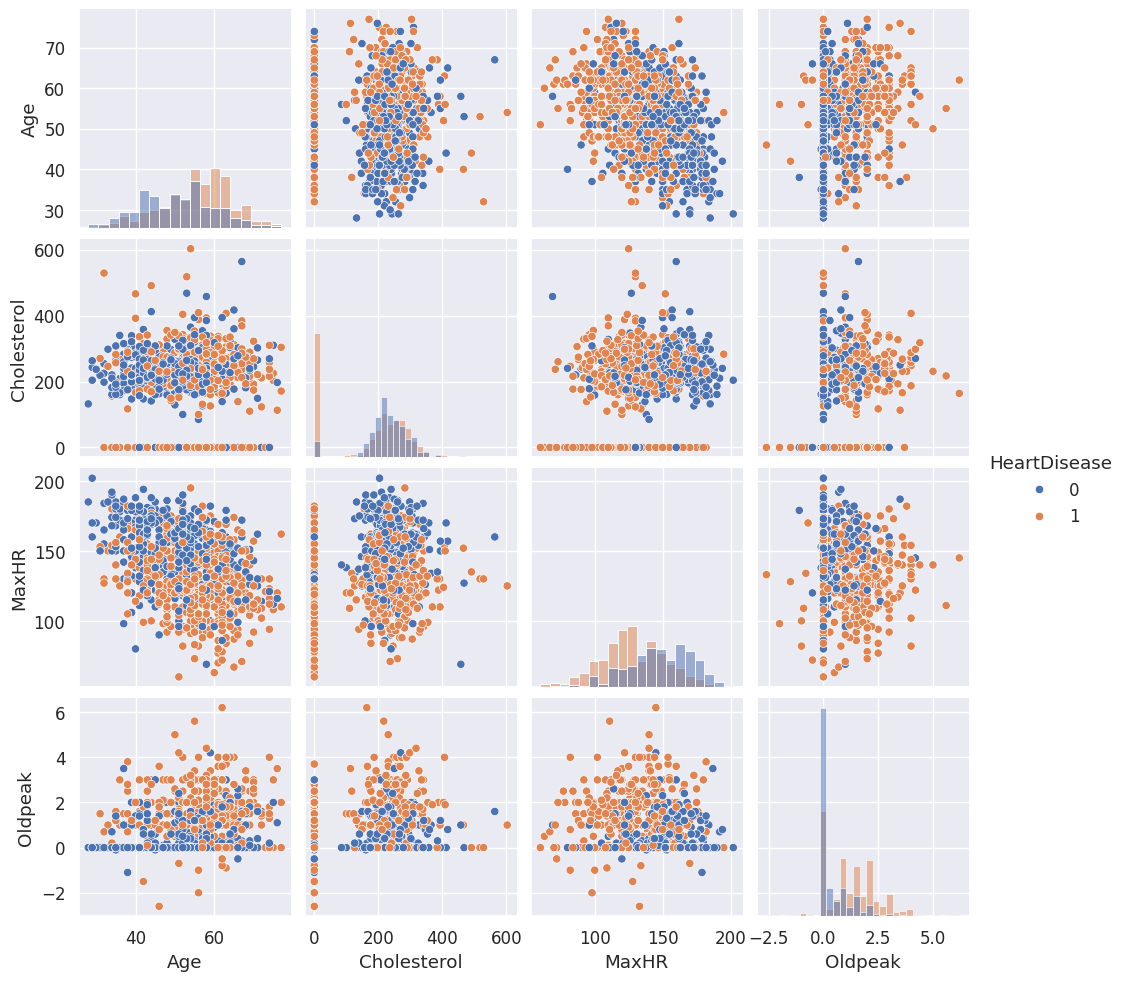

In [ ]:
sns.pairplot(df[["Age","Cholesterol","MaxHR", "Oldpeak", "HeartDisease"]],hue='HeartDisease',diag_kind ='hist')
plt.show()

### 7.2 Correlation Matrix and Heatmap

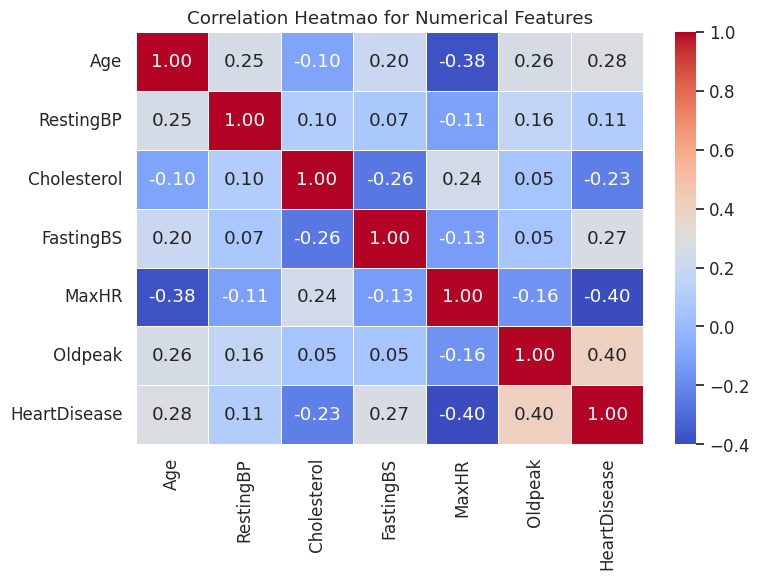

In [ ]:
corr_matrix = df[numeric_cols + [target_col]].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)
plt.title('Correlation Heatmao for Numerical Features')
plt.tight_layout()
plt.show()

In [ ]:
corr_matrix[target_col].sort_values(ascending=False)

,HeartDisease
HeartDisease,1.000000
Oldpeak,0.403951
Age,0.282039
FastingBS,0.267291
RestingBP,0.107589
Cholesterol,-0.232741
MaxHR,-0.400421


> Insight: High absolute correlation with the target is interesting, but do not ignore low correlation features. Some of them can become powerful in combination with others. Also watch for high correlation between predictors, which may indicate redundancy.

### 7.3 Categorical table vs Target


Proportion of HeartDisease within Sex


HeartDisease,0,1
Sex,,
F,0.740933,0.259067
M,0.368276,0.631724


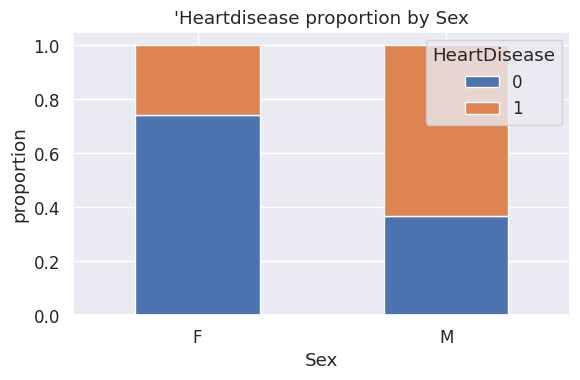


Proportion of HeartDisease within ChestPainType


HeartDisease,0,1
ChestPainType,,
ASY,0.209677,0.790323
ATA,0.861272,0.138728
NAP,0.645320,0.354680
TA,0.565217,0.434783


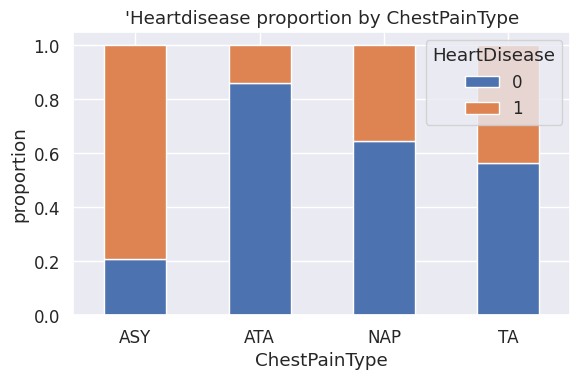


Proportion of HeartDisease within RestingECG


HeartDisease,0,1
RestingECG,,
LVH,0.436170,0.563830
Normal,0.483696,0.516304
ST,0.342697,0.657303


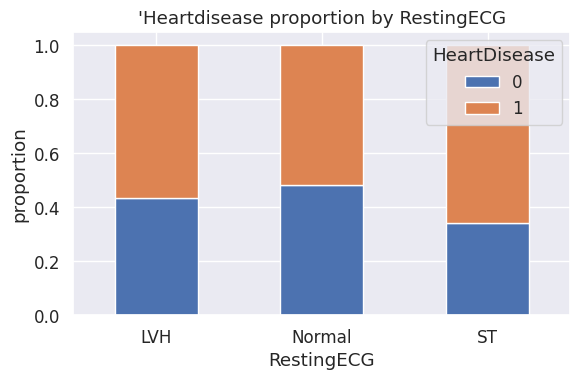


Proportion of HeartDisease within ExerciseAngina


HeartDisease,0,1
ExerciseAngina,,
N,0.648995,0.351005
Y,0.148248,0.851752


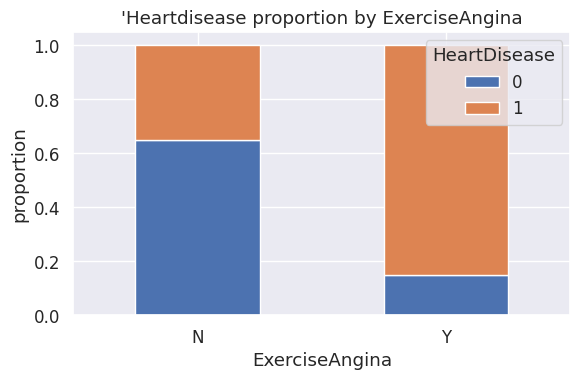


Proportion of HeartDisease within ST_Slope


HeartDisease,0,1
ST_Slope,,
Down,0.222222,0.777778
Flat,0.171739,0.828261
Up,0.802532,0.197468


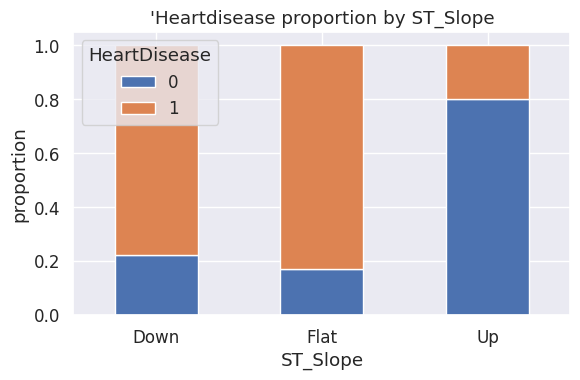

In [ ]:
for c in cat_cols:
  ct = pd.crosstab(df[c],df[target_col],normalize='index')
  print(f"\nProportion of HeartDisease within {c}")
  display(ct)

  ct.plot(kind='bar',stacked=True,figsize=(6,4))
  plt.title(f"'Heartdisease proportion by {c}")
  plt.ylabel('proportion')
  plt.xticks(rotation = 0)
  plt.tight_layout()
  plt.show()

### 8. Handling Missing Values

In this perticular dataset there is no missing value.For Now we ignore this.

### 9. Encoding Categorical Variables

In [ ]:
# Binary encoding
from sklearn.preprocessing import LabelEncoder


lebel = LabelEncoder()
df['Sex'] = lebel.fit_transform(df["Sex"])
df["ExerciseAngina"] = lebel.fit_transform(df["ExerciseAngina"])

# One hot encoding for nominal categorcal columns

categorical_cols =["ChestPainType","RestingECG","ST_Slope"]
df_heart_encoded = pd.get_dummies(df,columns=categorical_cols,dtype=int)
df_heart_encoded.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,0,1,0,0,0,1,0,0,0,1
1,49,0,160,180,0,156,0,1.0,1,0,0,1,0,0,1,0,0,1,0
2,37,1,130,283,0,98,0,0.0,0,0,1,0,0,0,0,1,0,0,1
3,48,0,138,214,0,108,1,1.5,1,1,0,0,0,0,1,0,0,1,0
4,54,1,150,195,0,122,0,0.0,0,0,0,1,0,0,1,0,0,0,1


### 10. Normalization and Scalling

###Normalization and Scaling

Real-life analogy: **comparing salary and height**.

- Height might range from 150 to 190 cm.
- Salary might range from 20,000 to 700,000.
- If we feed these two features directly into a distance-based model,
  salary will dominate the calculation.

To fix this, we **scale** numeric features so they are on a comparable range.

Common approaches:
- **StandardScaler**: transforms features to have mean 0 and standard deviation 1
- **MinMaxScaler**: rescales features to a fixed range, usually [0, 1]

Always fit the scaler on the **training set only**, then transform both
training and test sets using the same scaler.

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

# Assume df_heart_encoded is our working dataframe from this we select target features

target_col = "HeartDisease"

X = df_heart_encoded.drop(columns = [target_col])
y = df_heart_encoded[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=42)

# Standard Scalling

scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train) # Here mean and std will be calculated from X_train
X_test_std = scaler_std.transform(X_test)


# Min max scalling

scaler_mm = MinMaxScaler()
X_train_mm = scaler_mm.fit_transform(X_train)
X_test_mm = scaler_mm.transform(X_test)


# Robust Scalling

scaler_rb = RobustScaler()
X_train_rb = scaler_rb.fit_transform(X_train)
X_test_rb = scaler_rb.transform(X_test)

print("\n--- Displaying Standard Scaled Data ---")

# Convert scaled arrays back to the DataFrame for better visiualization with columns

X_train_std_df = pd.DataFrame(X_train_std,columns = X_train.columns, index = X_train.index)
X_test_std_df = pd.DataFrame(X_test_std,columns = X_test.columns, index = X_test.index)
display(X_train_std_df.head())
display(X_test_std_df.head())

print("\n--- Displaying Min Max Scaled Data ---")

# Convert scaled arrays back to the DataFrame for better visiualization with columns

X_train_mm_df = pd.DataFrame(X_train_mm,columns = X_train.columns, index = X_train.index)
X_test_mm_df = pd.DataFrame(X_test_mm,columns = X_test.columns, index = X_test.index)
display(X_train_mm_df.head())
display(X_test_mm_df.head())

print("\n--- Displaying Robust Scaled Data ---")

# Convert scaled arrays back to the DataFrame for better visiualization with columns

X_train_rb_df = pd.DataFrame(X_train_rb,columns = X_train.columns, index = X_train.index)
X_test_rb_df = pd.DataFrame(X_test_rb,columns = X_test.columns, index = X_test.index)
display(X_train_mm_df.head())
display(X_test_mm_df.head())


--- Displaying Standard Scaled Data ---


,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
155,0.239292,0.537019,1.183802,1.307314,1.877849,0.551672,1.182037,1.900458,0.905597,-0.480384,-0.530275,-0.213524,-0.505445,0.816002,-0.494088,-0.254981,0.962897,-0.851064
362,0.239292,0.537019,1.183802,-1.878000,-0.532524,-1.486343,-0.845997,-0.834739,-1.104244,-0.480384,1.885813,-0.213524,-0.505445,-1.225487,2.023931,-0.254981,0.962897,-0.851064
869,0.558968,0.537019,0.913811,0.096522,1.877849,0.831400,-0.845997,0.624033,-1.104244,-0.480384,1.885813,-0.213524,-0.505445,0.816002,-0.494088,-0.254981,-1.038533,1.174999
101,-0.293501,0.537019,-0.166155,-0.210833,-0.532524,-1.446382,-0.845997,-0.834739,0.905597,-0.480384,-0.530275,-0.213524,-0.505445,0.816002,-0.494088,-0.254981,-1.038533,1.174999
199,0.345851,-1.862131,-0.166155,0.990645,-0.532524,-1.526304,-0.845997,0.076994,-1.104244,-0.480384,-0.530275,4.683304,-0.505445,0.816002,-0.494088,-0.254981,0.962897,-0.851064


,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
668,0.985202,-1.862131,0.373828,-0.061812,-0.532524,1.710544,-0.845997,-0.834739,-1.104244,2.081666,-0.530275,-0.213524,-0.505445,0.816002,-0.494088,-0.254981,-1.038533,1.174999
30,-0.080384,0.537019,0.643819,2.946539,-0.532524,-0.247550,-0.845997,-0.834739,-1.104244,-0.480384,1.885813,-0.213524,-0.505445,0.816002,-0.494088,-0.254981,0.962897,-0.851064
377,1.198319,0.537019,1.453793,-1.878000,1.877849,-0.567238,-0.845997,0.259340,0.905597,-0.480384,-0.530275,-0.213524,-0.505445,-1.225487,2.023931,-0.254981,0.962897,-0.851064
535,0.239292,0.537019,-0.166155,-1.878000,-0.532524,-0.567238,1.182037,0.076994,0.905597,-0.480384,-0.530275,-0.213524,1.978455,-1.225487,-0.494088,-0.254981,0.962897,-0.851064
807,0.026175,0.537019,-1.354116,0.999959,-0.532524,0.791439,-0.845997,-0.834739,-1.104244,2.081666,-0.530275,-0.213524,-0.505445,0.816002,-0.494088,-0.254981,-1.038533,1.174999



--- Displaying Min Max Scaled Data ---


,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
155,0.562500,1.0,0.775,0.567164,1.0,0.674419,1.0,0.636364,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
362,0.562500,1.0,0.775,0.000000,0.0,0.279070,0.0,0.295455,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
869,0.625000,1.0,0.750,0.351575,1.0,0.728682,0.0,0.477273,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
101,0.458333,1.0,0.650,0.296849,0.0,0.286822,0.0,0.295455,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
199,0.583333,0.0,0.650,0.510779,0.0,0.271318,0.0,0.409091,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
668,0.708333,0.0,0.700,0.323383,0.0,0.899225,0.0,0.295455,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
30,0.500000,1.0,0.725,0.859038,0.0,0.519380,0.0,0.295455,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
377,0.750000,1.0,0.800,0.000000,1.0,0.457364,0.0,0.431818,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
535,0.562500,1.0,0.650,0.000000,0.0,0.457364,1.0,0.409091,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
807,0.520833,1.0,0.540,0.512438,0.0,0.720930,0.0,0.295455,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0



--- Displaying Robust Scaled Data ---


,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
155,0.562500,1.0,0.775,0.567164,1.0,0.674419,1.0,0.636364,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
362,0.562500,1.0,0.775,0.000000,0.0,0.279070,0.0,0.295455,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
869,0.625000,1.0,0.750,0.351575,1.0,0.728682,0.0,0.477273,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
101,0.458333,1.0,0.650,0.296849,0.0,0.286822,0.0,0.295455,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
199,0.583333,0.0,0.650,0.510779,0.0,0.271318,0.0,0.409091,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
668,0.708333,0.0,0.700,0.323383,0.0,0.899225,0.0,0.295455,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
30,0.500000,1.0,0.725,0.859038,0.0,0.519380,0.0,0.295455,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
377,0.750000,1.0,0.800,0.000000,1.0,0.457364,0.0,0.431818,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
535,0.562500,1.0,0.650,0.000000,0.0,0.457364,1.0,0.409091,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
807,0.520833,1.0,0.540,0.512438,0.0,0.720930,0.0,0.295455,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
